# Analysis of contextualization on attention explanation

In [2]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import sys
import os
from os import path

sys.path.append("./../src")
tmp_path = path.join('.cache', '2022-11-03')
os.makedirs(tmp_path,exist_ok=True)

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

summary_dir = '/Users/dunguyen/Projects/IGRIDA/historic/2022-11-03/summary'

datasets = {
    'hatexplain': 'HateXPlain',
    'yelphat50': 'YelpHat-50',
    'esnli': 'e-SNLI',
}

# Resume all summaries
MODEL_ARCHI = 'cnn_attention'
ROUND = 4
COLUMNS = ['a:AUPRC','y:fscore','a:Precision','a:Recall']

def confident_interval(x):
    return x['mean'].round(4).astype(str) + u"\u00B1" + (1.96*x['sem']).round(4).astype(str)

summaries = list()
for d in datasets:
    try:
        summaries.append(pd.read_parquet(path.join(summary_dir, MODEL_ARCHI, d, 'summary.parquet')))
    except: 
        pass

df = pd.concat(summaries)
df = df[df['n_kernel'] < 4]

# compute mean + std
mean = df.groupby(['data','n_kernel']).mean().round(ROUND)
std = df.groupby(['data','n_kernel']).std().round(ROUND)
mean_std = mean.astype(str) + u"\u00B1" + std.astype(str)

display(HTML('<h3>CNN Attention: mean \u00B1 std</h3>'))
display(mean_std[COLUMNS])

# compute with ci95

ci = df.groupby(['data','n_kernel']).agg(['mean', 'sem'])
ci = ci.groupby(level=0, axis=1).apply(lambda x: x[x.name].apply(confident_interval, axis=1))

display(HTML('<h3>CNN Attention: 95 Confidential</h3>'))
display(ci[COLUMNS])

a:AUPRC       y:fscore    a:Precision  \
data       n_kernel                                                
esnli      1          0.366±0.0247  0.7726±0.0052  0.4093±0.0207   
           2         0.3662±0.0116  0.7881±0.0002  0.3831±0.0117   
           3         0.3923±0.0045  0.7908±0.0007  0.4084±0.0062   
hatexplain 1         0.4752±0.0563  0.6159±0.0286  0.5046±0.0803   
           2         0.3325±0.0193  0.6492±0.0154  0.3339±0.0191   
           3         0.3698±0.0219  0.6386±0.0224  0.3709±0.0241   
yelphat50  1         0.3131±0.1406  0.9111±0.0201   0.389±0.2095   
           2         0.2001±0.0278   0.9256±0.015  0.2044±0.0305   
           3         0.3154±0.0654  0.9289±0.0107  0.3575±0.0917   

                          a:Recall  
data       n_kernel                 
esnli      1         0.3879±0.0261  
           2         0.4493±0.0055  
           3         0.4627±0.0026  
hatexplain 1          0.4354±0.052  
           2         0.5033±0.0489  
           3          0.513±0.0146  
yelphat50  1         0.4399±0.1345  
           2         0.4975±0.0806  
           3          0.4474±0.071

a:AUPRC       y:fscore    a:Precision  \
data       n_kernel                                                
esnli      1           0.366±0.028  0.7726±0.0059  0.4093±0.0234   
           2         0.3662±0.0131  0.7881±0.0002  0.3831±0.0132   
           3         0.3923±0.0051  0.7908±0.0008  0.4084±0.0071   
hatexplain 1         0.4752±0.0638  0.6159±0.0324  0.5046±0.0909   
           2         0.3325±0.0218  0.6492±0.0174  0.3339±0.0216   
           3         0.3698±0.0248  0.6386±0.0254  0.3709±0.0272   
yelphat50  1         0.3131±0.1591  0.9111±0.0227   0.389±0.2371   
           2         0.2001±0.0314   0.9256±0.017  0.2044±0.0345   
           3          0.3154±0.074  0.9289±0.0121  0.3575±0.1037   

                          a:Recall  
data       n_kernel                 
esnli      1         0.3879±0.0296  
           2         0.4493±0.0063  
           3          0.4627±0.003  
hatexplain 1         0.4354±0.0589  
           2         0.5033±0.0553  
           3          0.513±0.0165  
yelphat50  1         0.4399±0.1522  
           2         0.4975±0.0912  
           3         0.4474±0.0803

In [4]:
summary_dir = '/Users/dunguyen/Projects/IGRIDA/historic/2022-11-03/summary'

datasets = {
    'hatexplain': 'HateXPlain',
    'yelphat50': 'YelpHat-50',
    'esnli': 'e-SNLI',
}

# Resume all summaries
MODEL_ARCHI = 'mlp_attention'
ROUND = 4
COLUMNS = ['a:AUPRC','y:fscore','a:Precision','a:Recall']

def confident_interval(x):
    return x['mean'].round(4).astype(str) + u"\u00B1" + (1.96*x['sem']).round(4).astype(str)

summaries = list()
for d in datasets:
    try:
        summaries.append(pd.read_parquet(path.join(summary_dir, MODEL_ARCHI, d, 'summary.parquet')))
    except: 
        pass

df = pd.concat(summaries)

# compute mean + std
mean = df.groupby(['data','n_context']).mean().round(ROUND)
std = df.groupby(['data','n_context']).std().round(ROUND)
mean_std = mean.astype(str) + u"\u00B1" + std.astype(str)

display(HTML('<h3>MLP Attention: mean \u00B1 std</h3>'))
display(mean_std[COLUMNS])

# compute with ci95

ci = df.groupby(['data','n_context']).agg(['mean', 'sem'])
ci = ci.groupby(level=0, axis=1).apply(lambda x: x[x.name].apply(confident_interval, axis=1))

display(HTML('<h3>MLP Attention: 95 Confidential</h3>'))
display(ci[COLUMNS])

a:AUPRC       y:fscore    a:Precision  \
data       n_context                                                
esnli      1          0.4493±0.0088  0.7917±0.0192  0.4565±0.0218   
           2             0.4429±nan     0.8088±nan     0.4807±nan   
hatexplain 1            0.583±0.006  0.6115±0.0361  0.7862±0.0116   
           2            0.58±0.0048  0.6153±0.0484  0.7715±0.0136   
yelphat50  1          0.4497±0.0714  0.7181±0.1634  0.4921±0.1287   
           2          0.4184±0.0772  0.7122±0.1876  0.4241±0.1144   

                           a:Recall  
data       n_context                 
esnli      1          0.5136±0.0404  
           2              0.451±nan  
hatexplain 1          0.2412±0.0084  
           2           0.2505±0.011  
yelphat50  1          0.4394±0.0872  
           2           0.4975±0.074

a:AUPRC       y:fscore    a:Precision  \
data       n_context                                                
esnli      1           0.4493±0.007  0.7917±0.0154  0.4565±0.0175   
           2             0.4429±nan     0.8088±nan     0.4807±nan   
hatexplain 1           0.583±0.0034  0.6115±0.0204  0.7862±0.0066   
           2            0.58±0.0027  0.6153±0.0274  0.7715±0.0077   
yelphat50  1          0.4497±0.0467  0.7181±0.1067  0.4921±0.0841   
           2          0.4184±0.0617  0.7122±0.1501  0.4241±0.0915   

                           a:Recall  
data       n_context                 
esnli      1          0.5136±0.0323  
           2              0.451±nan  
hatexplain 1          0.2412±0.0047  
           2          0.2505±0.0062  
yelphat50  1           0.4394±0.057  
           2          0.4975±0.0592

In [5]:
df[df['data'] == 'esnli']['a:Precision']

run=2_esnli_ncontext=1_concat=1    0.487149
run=0_esnli_ncontext=2_concat=1    0.480682
run=1_esnli_ncontext=1_concat=1    0.452709
run=2_esnli_ncontext=1_concat=0    0.479203
run=0_esnli_ncontext=1_concat=0    0.434063
run=1_esnli_ncontext=1_concat=0    0.447989
run=0_esnli_ncontext=1_concat=1    0.438080
Name: a:Precision, dtype: float64

In [6]:
summary_dir = '/Users/dunguyen/Projects/IGRIDA/historic/2022-11-03/summary'

datasets = {
    'hatexplain': 'HateXPlain',
    'yelphat50': 'YelpHat-50',
    'esnli': 'e-SNLI',
}

# Resume all summaries
MODEL_ARCHI = 'lstm_attention'
ROUND = 4
COLUMNS = ['a:AUPRC','y:fscore','a:Precision','a:Recall']

def confident_interval(x):
    return x['mean'].round(4).astype(str) + u"\u00B1" + (1.96*x['sem']).round(4).astype(str)

summaries = list()
for d in datasets:
    try:
        summaries.append(pd.read_parquet(path.join(summary_dir, MODEL_ARCHI, d, 'summary.parquet')))
    except: 
        pass

df = pd.concat(summaries)

#TODO: Delete this if updated logs in esnli
if 'a:AUPrecision' in df:
    df.loc[df['data'] == 'esnli', 'a:Precision'] = df.loc[df['data'] == 'esnli', 'a:AUPrecision']
    df.loc[df['data'] == 'esnli', 'a:Recall'] = df.loc[df['data'] == 'esnli', 'a:AURecall']
    df = df.drop(columns=['a:AUPrecision', 'a:AURecall'])
    df.to_parquet(path.join(summary_dir, MODEL_ARCHI, d, 'summary.parquet'))

# compute mean + std
mean = df.groupby(['data','n_lstm']).mean().round(ROUND)
std = df.groupby(['data','n_lstm']).std().round(ROUND)
mean_std = mean.astype(str) + u"\u00B1" + std.astype(str)

display(HTML('<h3>LSTM Attention: mean \u00B1 std</h3>'))
display(mean_std[COLUMNS])

# compute with ci95

ci = df.groupby(['data','n_lstm']).agg(['mean', 'sem'])
ci = ci.groupby(level=0, axis=1).apply(lambda x: x[x.name].apply(confident_interval, axis=1))

display(HTML('<h3>LSTM Attention: 95 Confidential</h3>'))
display(ci[COLUMNS])

a:AUPRC       y:fscore    a:Precision       a:Recall
data       n_lstm                                                            
esnli      1       0.4394±0.0057  0.8148±0.0027  0.4826±0.0065  0.4294±0.0034
           3       0.3985±0.0092  0.8032±0.0019  0.4222±0.0116  0.4452±0.0009
           5       0.3412±0.0123  0.7791±0.0052  0.3525±0.0145   0.4547±0.003
hatexplain 1       0.5432±0.0306  0.6251±0.0128  0.6744±0.0555  0.2454±0.0106
           3         0.3882±0.01  0.6386±0.0126  0.3876±0.0062  0.4381±0.0144
           5       0.3677±0.0193  0.6232±0.0177   0.3689±0.025  0.3999±0.0336
yelphat50  1        0.3863±0.018  0.9356±0.0017  0.4329±0.0176    0.406±0.031
           3       0.2068±0.0608  0.8833±0.0473  0.1946±0.0529  0.4382±0.0937
           5       0.1602±0.0004   0.925±0.0096  0.1495±0.0026  0.2938±0.0349

a:AUPRC       y:fscore    a:Precision       a:Recall
data       n_lstm                                                            
esnli      1       0.4394±0.0064  0.8148±0.0031  0.4826±0.0074  0.4294±0.0039
           3       0.3985±0.0128  0.8032±0.0026   0.4222±0.016  0.4452±0.0013
           5       0.3412±0.0139  0.7791±0.0059  0.3525±0.0164  0.4547±0.0034
hatexplain 1       0.5432±0.0245  0.6251±0.0102  0.6744±0.0444  0.2454±0.0085
           3        0.3882±0.008  0.6386±0.0101   0.3876±0.005  0.4381±0.0115
           5       0.3677±0.0155  0.6232±0.0142    0.3689±0.02  0.3999±0.0269
yelphat50  1       0.3863±0.0144  0.9356±0.0014  0.4329±0.0141   0.406±0.0248
           3       0.2068±0.0487  0.8833±0.0379  0.1946±0.0423   0.4382±0.075
           5       0.1602±0.0004   0.925±0.0094  0.1495±0.0025  0.2938±0.0342

In [21]:
summary_dir = '/Users/dunguyen/Projects/IGRIDA/historic/2022-11-03/summary'

datasets = {
    'hatexplain': 'HateXPlain',
    'yelphat50': 'YelpHat-50',
    'esnli': 'e-SNLI',
}

# Resume all summaries
MODEL_ARCHI = 'auto_attention'
ROUND = 4
COLUMNS = ['a:AUPRC','y:fscore','a:Precision','a:Recall']

def confident_interval(x):
    return x['mean'].round(4).astype(str) + u"\u00B1" + (1.96*x['sem']).round(4).astype(str)

summaries = list()
for d in datasets:
    try:
        summaries.append(pd.read_parquet(path.join(summary_dir, MODEL_ARCHI, d, 'summary.parquet')))
    except: 
        pass

df = pd.concat(summaries)

#TODO: Delete this if updated logs in esnli
if 'a:AUPrecision' in df:
    df.loc[df['data'] == 'esnli', 'a:Precision'] = df.loc[df['data'] == 'esnli', 'a:AUPrecision']
    df.loc[df['data'] == 'esnli', 'a:Recall'] = df.loc[df['data'] == 'esnli', 'a:AURecall']
    df = df.drop(columns=['a:AUPrecision', 'a:AURecall'])
    df.to_parquet(path.join(summary_dir, MODEL_ARCHI, d, 'summary.parquet'))

# compute mean + std
mean = df.groupby(['data','num_layers']).mean().round(ROUND)
std = df.groupby(['data','num_layers']).std().round(ROUND)
mean_std = mean.astype(str) + u"\u00B1" + std.astype(str)

display(HTML('<h3>Auto Attention: mean \u00B1 std</h3>'))
display(mean_std[COLUMNS])

# compute with ci95

ci = df.groupby(['data','num_layers']).agg(['mean', 'sem'])
ci = ci.groupby(level=0, axis=1).apply(lambda x: x[x.name].apply(confident_interval, axis=1))

display(HTML('<h3>Auto Attention: 95 Confidential</h3>'))
display(ci[COLUMNS])

a:AUPRC       y:fscore    a:Precision  \
data       num_layers                                                
esnli      1           0.3645±0.0073  0.6405±0.0033  0.5593±0.0073   
           2           0.3854±0.0207   0.8002±0.002  0.5853±0.0319   
           3           0.3608±0.0164  0.7487±0.0949  0.5563±0.0295   
           4              0.3825±nan     0.8289±nan     0.5943±nan   
           5               0.397±nan      0.816±nan     0.6163±nan   
hatexplain 1           0.5218±0.0165  0.6309±0.0181  0.8136±0.0425   
           2               0.426±nan     0.5993±nan     0.6464±nan   
           3           0.4696±0.0361   0.6246±0.019  0.7528±0.1005   
           4           0.4597±0.0254  0.5962±0.0694  0.7879±0.0337   
           5           0.3801±0.0229  0.6232±0.0175   0.5271±0.082   
yelphat50  1           0.3768±0.0116  0.9056±0.0227  0.7903±0.0353   
           2              0.3387±nan     0.8967±nan     0.8294±nan   
           3           0.2955±0.0285  0.9053±0.0124  0.6096±0.0632   
           4           0.2719±0.0487  0.7633±0.2425  0.5223±0.1469   
           5             0.278±0.022  0.7644±0.2147  0.5904±0.1357   

                            a:Recall  
data       num_layers                 
esnli      1           0.1545±0.0064  
           2            0.1239±0.015  
           3            0.113±0.0078  
           4              0.1301±nan  
           5              0.1282±nan  
hatexplain 1           0.1143±0.0078  
           2               0.095±nan  
           3           0.1029±0.0108  
           4            0.108±0.0038  
           5            0.0744±0.012  
yelphat50  1           0.0975±0.0047  
           2              0.0803±nan  
           3           0.0584±0.0068  
           4           0.0519±0.0122  
           5           0.0616±0.0037

a:AUPRC       y:fscore    a:Precision  \
data       num_layers                                                
esnli      1           0.3645±0.0083  0.6405±0.0037  0.5593±0.0083   
           2           0.3854±0.0234  0.8002±0.0023  0.5853±0.0361   
           3           0.3608±0.0185  0.7487±0.1074  0.5563±0.0334   
           4              0.3825±nan     0.8289±nan     0.5943±nan   
           5               0.397±nan      0.816±nan     0.6163±nan   
hatexplain 1           0.5218±0.0186  0.6309±0.0205  0.8136±0.0481   
           2               0.426±nan     0.5993±nan     0.6464±nan   
           3           0.4696±0.0316  0.6246±0.0166  0.7528±0.0881   
           4           0.4597±0.0287  0.5962±0.0785  0.7879±0.0382   
           5           0.3801±0.0259  0.6232±0.0198  0.5271±0.0928   
yelphat50  1           0.3768±0.0131  0.9056±0.0257  0.7903±0.0399   
           2              0.3387±nan     0.8967±nan     0.8294±nan   
           3            0.2955±0.025  0.9053±0.0109  0.6096±0.0554   
           4           0.2719±0.0552  0.7633±0.2744  0.5223±0.1662   
           5            0.278±0.0249   0.7644±0.243  0.5904±0.1536   

                            a:Recall  
data       num_layers                 
esnli      1           0.1545±0.0072  
           2            0.1239±0.017  
           3            0.113±0.0088  
           4              0.1301±nan  
           5              0.1282±nan  
hatexplain 1           0.1143±0.0089  
           2               0.095±nan  
           3           0.1029±0.0095  
           4            0.108±0.0043  
           5           0.0744±0.0136  
yelphat50  1           0.0975±0.0053  
           2              0.0803±nan  
           3            0.0584±0.006  
           4           0.0519±0.0138  
           5           0.0616±0.0042

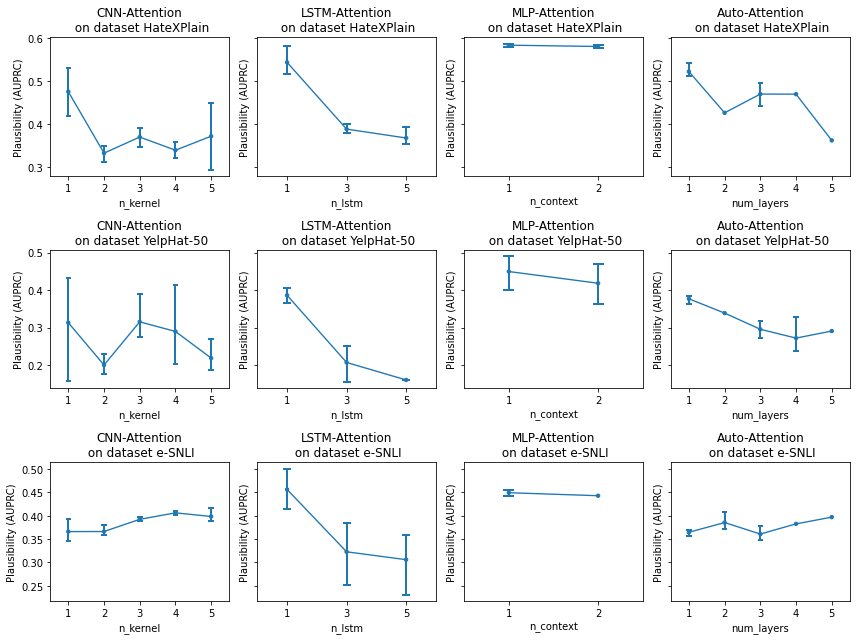

In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

summary_dir = '/Users/dunguyen/Projects/IGRIDA/historic/2022-11-03/summary'

models = {
    'cnn_attention': 'CNN-Attention',
    'lstm_attention': 'LSTM-Attention',
    'mlp_attention': 'MLP-Attention',
    'auto_attention': 'Auto-Attention',
}

datasets = {
    'hatexplain': 'HateXPlain',
    'yelphat50': 'YelpHat-50',
    'esnli': 'e-SNLI',
}

criteria = {
    'cnn_attention': 'n_kernel',
    'mlp_attention': 'n_context',
    'lstm_attention': 'n_lstm',
    'auto_attention': 'num_layers'
}


def plot_criteria(df, y_axis, fpath, models, datasets, criteria, ylabel=None):
    fig, axes = plt.subplots(3, 4, figsize=(12, 9), sharey='row')
    col = 0
    row = 0

    for m, model_name in models.items():
        for d, dataset_name in datasets.items():
            parquet_path = path.join(summary_dir, m, d, 'summary.parquet')
            summary = pd.read_parquet(parquet_path) 
            ax = axes[row][col]

            g = sns.pointplot(ax=ax, data=summary, x=criteria[m], y=y_axis, 
                                    linestyles='-',
                                    errwidth=2, 
                                    capsize=0.1, 
                                    dodge=True, 
                                    scale=0.5,
                                    #palette='husl'
                                   )
            
            g.set_title(f'{model_name}\n on dataset {dataset_name}')
            g.set(ylabel=ylabel or y_axis, xlabel=criteria[m])

            row += 1

        col += 1
        row = 0

    fig.tight_layout()
    plt.savefig(fpath, bbox_inches="tight")
    plt.show()
    
plot_criteria(df, 'a:AUPRC', path.join(tmp_path, 'summary_auprc.png'), models, datasets, criteria, ylabel='Plausibility (AUPRC)')

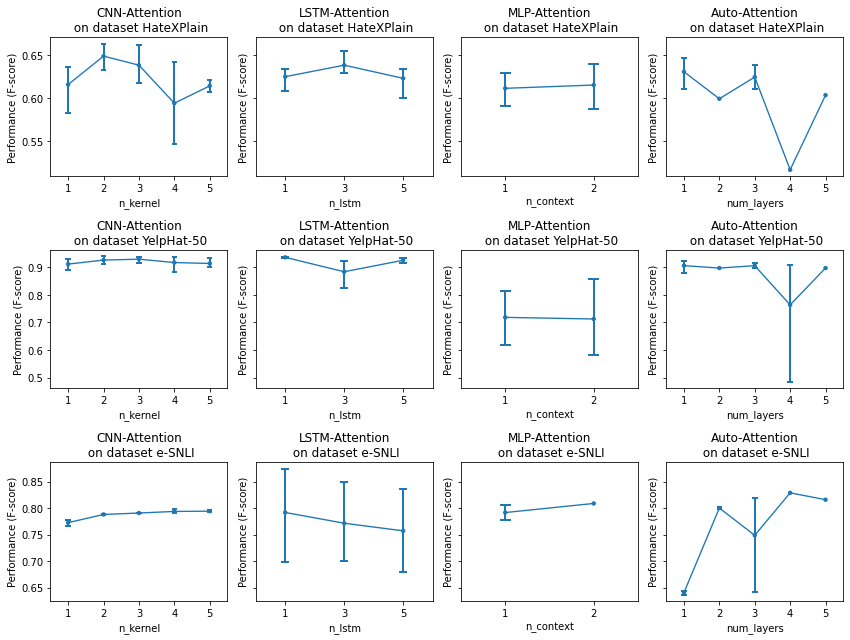

In [17]:
plot_criteria(df, 'y:fscore', path.join(tmp_path, 'summary_fscore.png'), models, datasets, criteria, ylabel='Performance (F-score)')

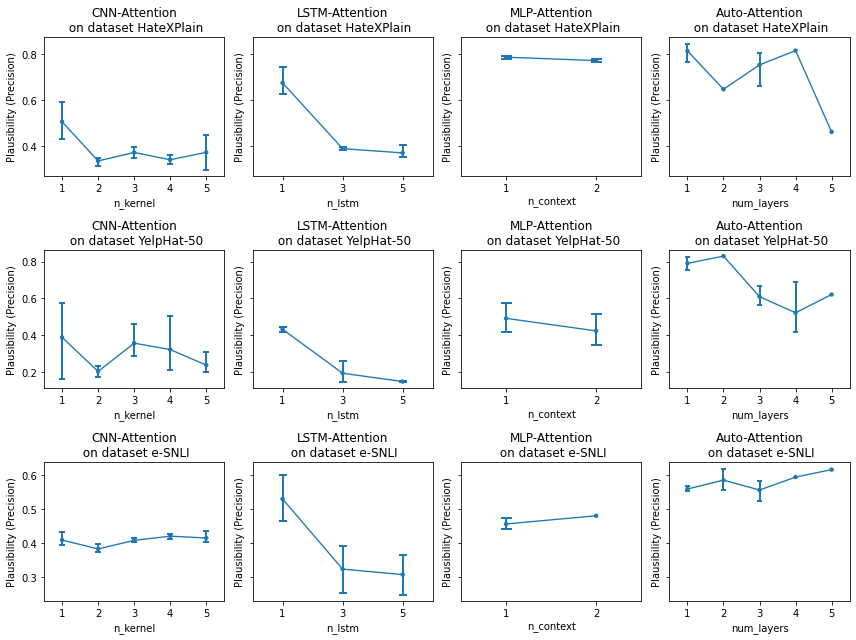

In [19]:
plot_criteria(df, 'a:Precision', path.join(tmp_path, 'summary_precision.png'), models, datasets, criteria, ylabel='Plausibility (Precision)')

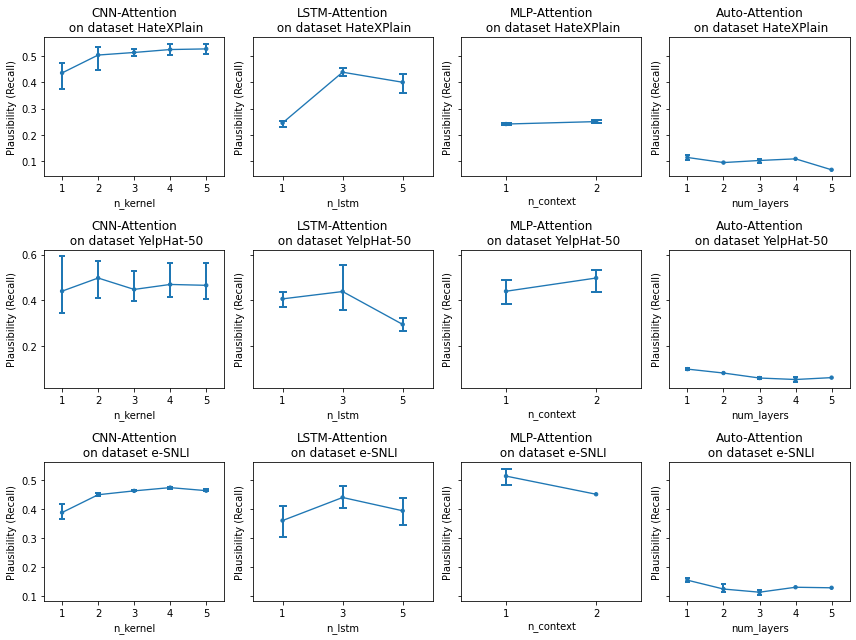

In [18]:
plot_criteria(df, 'a:Recall', path.join(tmp_path, 'summary_recall.png'), models, datasets, criteria, ylabel='Plausibility (Recall)')